# **RANDOM SAMPLE IMPUTATION:**


In [81]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

In [82]:
df = pd.read_csv('train.csv', usecols=['Age', 'Fare', 'Survived'])

In [83]:
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [84]:
df.isnull().mean() * 100

Survived     0.00000
Age         19.86532
Fare         0.00000
dtype: float64

In [85]:
X = df.drop(columns=['Survived'])
y = df['Survived']

In [86]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=2)

In [87]:
X_train

,Age,Fare
30,40.0,27.7208
10,4.0,16.7000
873,47.0,9.0000
182,9.0,31.3875
876,20.0,9.8458
...,...,...
534,30.0,8.6625
584,NaN,8.7125
493,71.0,49.5042
527,NaN,221.7792


In [88]:
X_train['Age_imputed'] = X_train['Age']
X_test['Age_imputed'] = X_test['Age']

In [89]:
X_test.tail()

,Age,Fare,Age_imputed
89,24.0,8.0500,24.0
80,22.0,9.0000,22.0
846,NaN,69.5500,NaN
870,26.0,7.8958,26.0
251,29.0,10.4625,29.0


In [90]:
X_train.loc[X_train['Age_imputed'].isnull(), 'Age_imputed'] = X_train['Age'].dropna(
).sample(X_train['Age'].isnull().sum()).values

X_test.loc[X_test['Age_imputed'].isnull(), 'Age_imputed'] = X_train['Age'].dropna(
).sample(X_test['Age'].isnull().sum()).values

In [91]:
X_train['Age'].dropna().sample(X_train['Age'].isnull().sum()).values

array([24.  , 30.  , 51.  , 19.  , 30.  , 14.  , 16.  , 18.  , 16.  ,
       38.  , 29.  , 17.  , 16.  , 40.  , 61.  , 27.  , 54.  , 34.  ,
       35.  , 10.  , 47.  , 21.  , 26.  , 50.  , 46.  , 60.  , 22.  ,
       22.  , 26.  , 22.  , 21.  , 32.  , 21.  ,  2.  ,  3.  , 14.  ,
       32.  , 40.  , 29.  , 40.  , 28.  , 19.  , 70.  , 34.  , 29.  ,
       45.  , 39.  , 22.  , 17.  , 52.  , 18.  , 49.  , 30.  , 24.  ,
       32.  , 43.  ,  0.75, 35.  , 58.  ,  4.  , 22.  , 50.  ,  4.  ,
       16.  ,  4.  , 26.  , 57.  , 35.  , 32.  , 36.  , 42.  , 37.  ,
       47.  , 21.  , 40.  , 34.  ,  0.42, 51.  , 35.  , 42.  , 30.  ,
       25.  , 25.  ,  0.67, 35.  , 20.  , 23.  , 28.  , 31.  , 29.  ,
       22.  , 20.  , 34.  , 38.  , 20.  , 36.  , 42.  , 45.  , 32.  ,
        5.  ,  4.  , 50.  , 39.  , 31.  , 24.  , 33.  , 30.  , 34.  ,
       16.  ,  5.  , 19.  , 36.  , 27.  , 41.  , 20.  , 45.  , 42.  ,
       33.  ,  2.  , 48.  , 31.  , 13.  , 58.  , 25.  , 17.  , 34.  ,
       45.  , 15.  ,

In [92]:
X_train['Age'].isnull().sum()

np.int64(148)

In [93]:
X_train

,Age,Fare,Age_imputed
30,40.0,27.7208,40.0
10,4.0,16.7000,4.0
873,47.0,9.0000,47.0
182,9.0,31.3875,9.0
876,20.0,9.8458,20.0
...,...,...,...
534,30.0,8.6625,30.0
584,NaN,8.7125,23.0
493,71.0,49.5042,71.0
527,NaN,221.7792,5.0


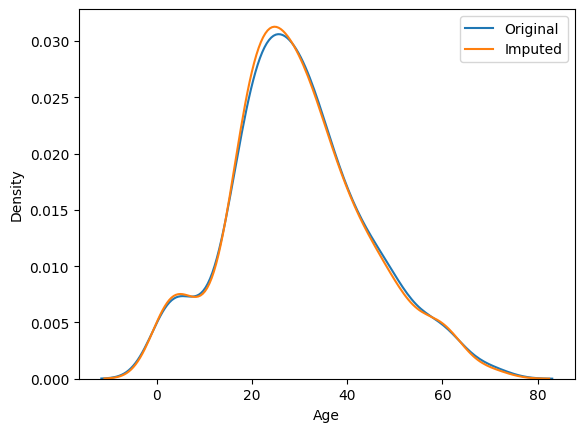

In [94]:
sns.kdeplot(X_train['Age'], label='Original', fill=False)
sns.kdeplot(X_train['Age_imputed'], label='Imputed', fill=False)

plt.legend()
plt.show()

In [95]:
print('Original variable variance: ', X_train['Age'].var())
print('Variance after random imputation: ', X_train['Age_imputed'].var())

Original variable variance:  204.34951339046142
Variance after random imputation:  200.9571411076344


In [96]:
X_train[['Fare', 'Age', 'Age_imputed']].cov()

,Fare,Age,Age_imputed
Fare,2368.246832,71.512440,55.805708
Age,71.512440,204.349513,204.349513
Age_imputed,55.805708,204.349513,200.957141


<Axes: >

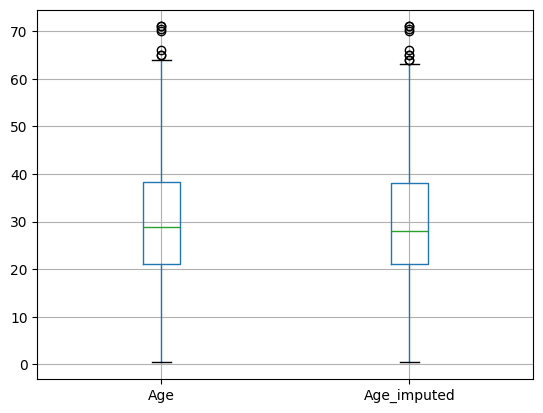

In [97]:
X_train[['Age', 'Age_imputed']].boxplot()

In [98]:
# Define observation as a specific row from X_train
observation = X_train.iloc[0]

# Sample a value from the 'Age' column based on the 'Fare' value of the observation
sampled_value = X_train['Age'].dropna().sample(
    1, random_state=int(observation['Fare']))

In [99]:
data = pd.read_csv('house-train.csv',
                   usecols=['GarageQual', 'FireplaceQu', 'SalePrice'])

In [100]:
data.head()

,FireplaceQu,GarageQual,SalePrice
0,NaN,TA,208500
1,TA,TA,181500
2,TA,TA,223500
3,Gd,TA,140000
4,TA,TA,250000


In [101]:
data.isnull().mean() * 100

FireplaceQu    47.260274
GarageQual      5.547945
SalePrice       0.000000
dtype: float64

In [102]:
X = data
y = data['SalePrice']

In [103]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=2)

In [104]:
X_train['GarageQual_imputed'] = X_train['GarageQual']
X_test['GarageQual_imputed'] = X_test['GarageQual']

X_train['FireplaceQu_imputed'] = X_train['FireplaceQu']
X_test['FireplaceQu_imputed'] = X_test['FireplaceQu']

In [105]:
X_train.sample(5)

,FireplaceQu,GarageQual,SalePrice,GarageQual_imputed,FireplaceQu_imputed
63,NaN,TA,140000,TA,NaN
1165,NaN,TA,233170,TA,NaN
1292,NaN,TA,107500,TA,NaN
565,NaN,TA,128000,TA,NaN
1365,NaN,TA,216000,TA,NaN


In [ ]:
X_train.loc[X_train['GarageQual_imputed'].isnull(), 'GarageQual_imputed'] = X_train['GarageQual'].dropna(
).sample(X_train['GarageQual'].isnull().sum()).values

X_test.loc[X_test['GarageQual_imputed'].isnull(), 'GarageQual_imputed'] = X_train['GarageQual'].dropna(
).sample(X_test['GarageQual'].isnull().sum()).values

X_train.loc[X_train['FireplaceQu_imputed'].isnull(), 'FireplaceQu_imputed'] = X_train['FireplaceQu'].dropna(
).sample(X_train['FireplaceQu'].isnull().sum()).values

X_test.loc[X_test['FireplaceQu_imputed'].isnull(), 'FireplaceQu_imputed'] = X_train['FireplaceQu'].dropna(
).sample(X_test['FireplaceQu'].isnull().sum()).values

In [46]:
temp = pd.concat(
    [
        X_train['GarageQual'].value_counts(
        ) / len(X_train['GarageQual'].dropna()),
        X_train['GarageQual_imputed'].value_counts() / len(X_train)
    ],
    axis=1)

temp.columns = ['original', 'imputed']

In [47]:
temp

,original,imputed
TA,0.951043,0.949486
Fa,0.037171,0.036815
Gd,0.009973,0.011130
Po,0.000907,0.001712
Ex,0.000907,0.000856


In [48]:
temp = pd.concat(
    [
        X_train['FireplaceQu'].value_counts(
        ) / len(X_train['FireplaceQu'].dropna()),
        X_train['FireplaceQu_imputed'].value_counts() / len(df)
    ],
    axis=1)

temp.columns = ['original', 'imputed']

temp

,original,imputed
Gd,0.494272,0.654321
TA,0.412439,0.534231
Fa,0.040917,0.054994
Po,0.027823,0.037037
Ex,0.024550,0.030303


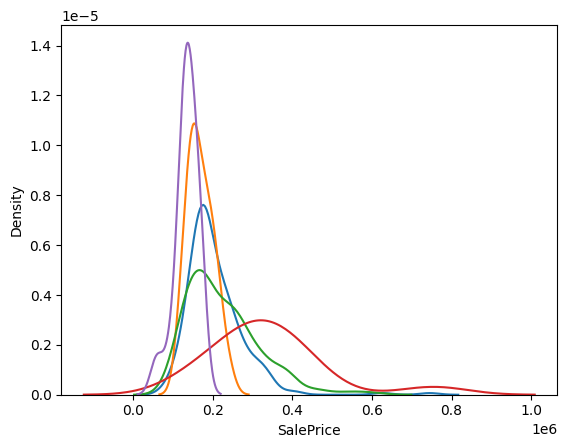

In [107]:
for category in X_train['FireplaceQu'].dropna().unique():
    sns.kdeplot(X_train[X_train['FireplaceQu'] == category]
                ['SalePrice'], label=category, fill=False)
plt.show()

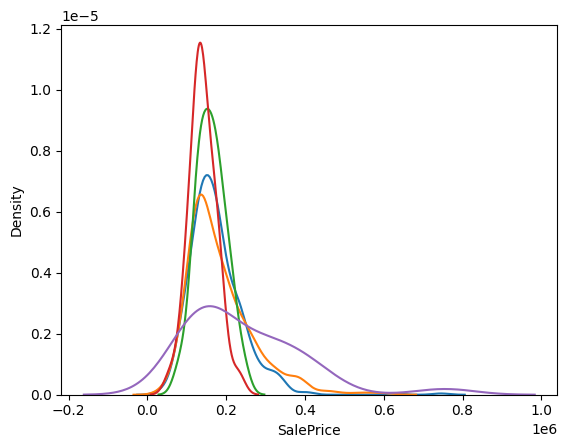

In [109]:
for category in X_train['FireplaceQu_imputed'].dropna().unique():
    sns.kdeplot(X_train[X_train['FireplaceQu_imputed'] ==
                 category]['SalePrice'], label=category)
plt.show()